We have a movies dataset and in this project we will be checking which factors affect the gross of a movie. Initially we correlate the budget and gross of a movie. Intuitively, if a movie has very high budget it may have performed well.

In [110]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

matplotlib.rcParams['figure.figsize']=(12,8) #Adjust the configuration of the plot we will create


In [111]:
#reading the data

df=pd.read_csv('/content/drive/MyDrive/projects/movies.csv')


In [112]:
# looking at data
df.head(5)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## HANDLING MISSING VALUES

In [113]:
# checking missing datas

for col in df.columns:
  pct_missing=np.mean(df[col].isnull())
  print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [114]:
# data types for our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [115]:
# for movies where budget was missing we assigned the mean of the budget of movies whose budget as available
df.loc[df['budget'].isna(),'budget'] =df[df['budget'].notna()]['budget'].mean()

In [116]:
# for movies where gross was missing we assigned the mean of the gross of movies whose gross as available
df.loc[df['gross'].isna(),'gross'] =df[df['gross'].notna()]['gross'].mean()

In [117]:
# for movies where runtime was missing we assigned the mean of the runtime of movies whose runtime as available
df.loc[df['runtime'].isna(),'runtime'] =df[df['runtime'].notna()]['runtime'].mean()

## DATA CLEANING

In [118]:
## changing data type of some columns
df['budget']=df['budget'].astype('int64')

df['gross']=df['gross'].astype('int64')


In [119]:
df.sort_values(by=['gross'],inplace=False,ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876,1400,British Broadcasting Corporation (BBC),103.0
7625,The Untold Story,NaN,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,35589876,790,Visual Arts Entertainment,104.0
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93.0
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0


In [49]:
# To see the whole data run following code
# pd.set_option('display.max_rows',None)

In [120]:
df.sort_values(by=['gross'],inplace=False,ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876,1400,British Broadcasting Corporation (BBC),103.0
7625,The Untold Story,NaN,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,35589876,790,Visual Arts Entertainment,104.0
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93.0
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0


In [121]:
#checking duplicate movie names and if exists then dropping them

df.drop_duplicates()

# we see below tha there are no duplicates as the number of rows before and after running the above code are equal

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.000000
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.000000
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.000000
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.000000
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,78500541,NaN,90.000000
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,35589876,78500541,Cactus Blue Entertainment,90.000000
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,78500541,Embi Productions,107.261613
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,78500541,NaN,120.000000


## Finding correlations in the data

### Budget vs gross

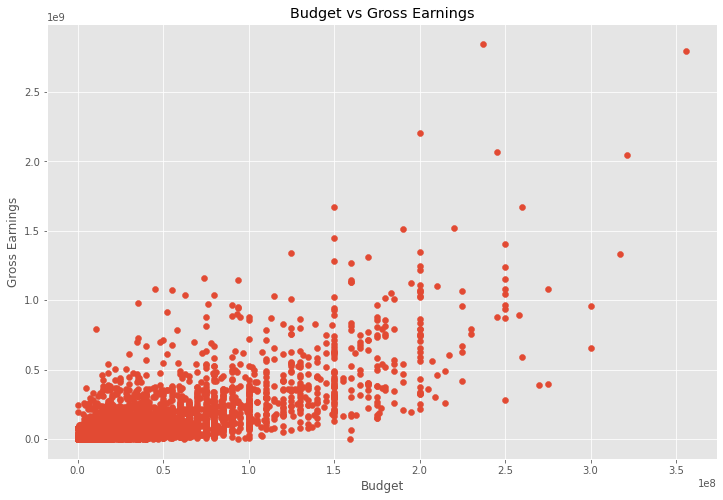

In [122]:
# scatter plot with budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.title('Budget vs Gross Earnings')
plt.show()

From the above plot we kind of can guess that the more budget movies have good gross earnings but to confirm of our guess we plot another plot and add a regression line in the plot above. The regression line will give us some better idea

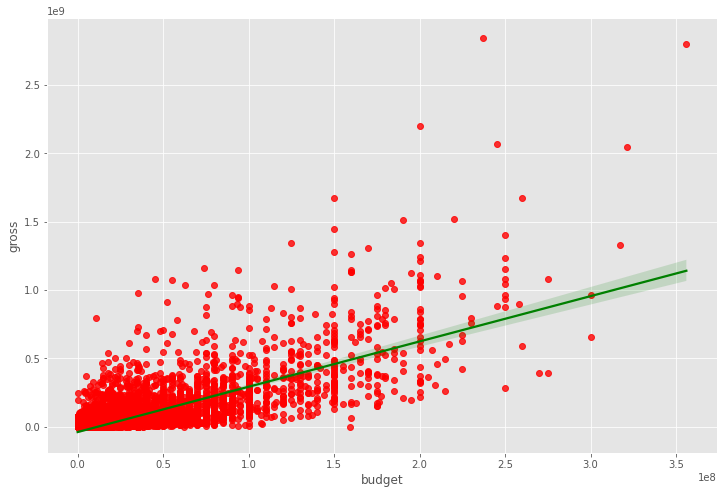

In [123]:
# plot the budget vs gross using seaborn
sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"red"},line_kws={"color":"green"})

The above plot shows that the budget and gross earnings of a movie are positively correlated. Now, let us determine the correlation.

In [124]:
df.corr(method='pearson')
#different methods for calculating the correlation are "pearson","kendall","spearman" with "pearson" being the default


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.265578,0.252042,0.120766
score,0.097995,1.000000,0.409182,0.064554,0.182868,0.399378
votes,0.222945,0.409182,1.000000,0.421090,0.628713,0.309204
budget,0.265578,0.064554,0.421090,1.000000,0.711270,0.265287
gross,0.252042,0.182868,0.628713,0.711270,1.000000,0.241335
runtime,0.120766,0.399378,0.309204,0.265287,0.241335,1.000000


We see that the budget and gross earnings of the movies are highly correlated. The following visualization of the above correlation data also confirms this.

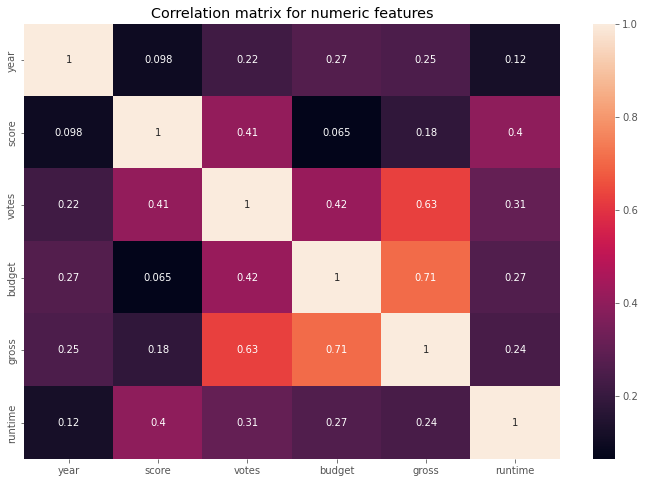

In [125]:
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation matrix for numeric features")
plt.show()

### Company vs Gross

In order to find correaltions between gross earning and other features, we numerize other features. For example, the company names will be associated a number each. By doing so we can find correlation between the companies and gross earnings of a movies from those companies.

In [126]:
df_numerized=df.copy()

for col_name in df_numerized.columns:
  if(df_numerized[col_name].dtype=='object'):
    df_numerized[col_name] = df_numerized[col_name].astype('category')
    df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.000000
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.000000
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.000000
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.000000
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000,78500541,-1,90.000000
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,35589876,78500541,539,90.000000
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750,78500541,941,107.261613
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000,78500541,-1,120.000000


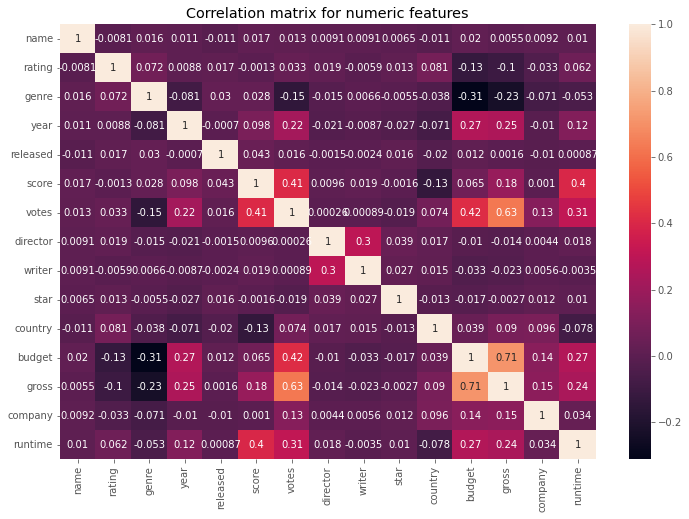

In [127]:
sns.heatmap(df_numerized.corr(),annot=True)
plt.title("Correlation matrix for numeric features")
plt.show()

 We see that gross earnings of a movie and the movie company are not that correlated with each other as the correlation between them is only 0.15

### Other Correlations

In [128]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()

corr_pairs


name     name        1.000000
         rating     -0.008069
         genre       0.016355
         year        0.011453
         released   -0.011311
                       ...   
runtime  country    -0.078297
         budget      0.265287
         gross       0.241335
         company     0.034383
         runtime     1.000000
Length: 225, dtype: float64

In [129]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

budget   genre     -0.310566
genre    budget    -0.310566
gross    genre     -0.230267
genre    gross     -0.230267
votes    genre     -0.145307
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [131]:
high_corr = sorted_pairs[(sorted_pairs>= 0.5) & (sorted_pairs != 1)]
high_corr

gross   votes     0.628713
votes   gross     0.628713
budget  gross     0.711270
gross   budget    0.711270
dtype: float64

We see that the votes for a movie and high earning movies are highly correlated. This is kind of obvious as movies which performed well were loved by people and they voted for the movie.

In [133]:
moderately_corr = sorted_pairs[(sorted_pairs>= 0.25) & (sorted_pairs < 0.5)]
moderately_corr

gross     year        0.252042
year      gross       0.252042
budget    runtime     0.265287
runtime   budget      0.265287
year      budget      0.265578
budget    year        0.265578
writer    director    0.299067
director  writer      0.299067
runtime   votes       0.309204
votes     runtime     0.309204
runtime   score       0.399378
score     runtime     0.399378
          votes       0.409182
votes     score       0.409182
budget    votes       0.421090
votes     budget      0.421090
dtype: float64

We can see that the release year of a movie and gross earning of that movie are moderately correlated. 

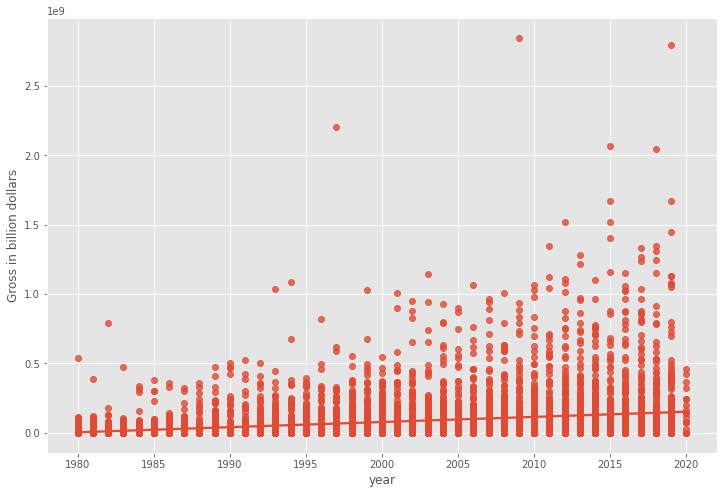

In [137]:
sns.regplot(x='year',y='gross',data=df)
plt.ylabel('Gross in billion dollars')
plt.show()

Although the year and gross earning are positively correlated but the correlation is not much. High earning movies are released frequently in last 20 years.We see that most of the high earning movies (with gross earning greater than 1 billion dollars) were released in the last decade or recently.

## CONCLUSION

From the above analysis we can conclude that movies with high budget earned well. We can't say that the movies of a particular company earned more. With increase in years the average earning of movies for a year is also increasing. Many high earning (say more than 1 billion dollars) movies were released recently.